# Eigendecomposition

## Dependency

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Application of eigendecomposition

- Principal component analysis
- Regularization such as ridge regression
- Linear discriminant analysis
- Support vector machine

So you need to understand eigendecomposition.

## Eigenvalue

### How to compute eigenvalue

$$ A v = \lambda v $$
$$ A v - \lambda v = 0 $$
$$ (A - \lambda I) v = 0 $$

We cannot do $(A - \lambda) v$, because $A$ is a matrix, but $\lambda$ is a scalar.

$(A - \lambda I) v = 0$ means that a vector $v$ is in the **null space** of a matrix $A$ shifted by $-\lambda I$, because it's producting 0 vector. $B v = 0$ means $v$ is in the **null space** of a matrix $B$.

In eigendecomposition, we exclude a case where $v$ is a vector of all 0s. $v$ needs to have at least one element non-zero. So to produce 0 at the right side of the equation, $(A - \lambda I)$ must be a **singular matrix** (**reduced rank matrix**). If $(A - \lambda I)$ is a singular matrix, it means that a **determinant** of $(A - \lambda I)$ is 0.

$$ |A - \lambda I| = 0 $$

In $(A - \lambda I) v = 0$, $0$ is a 0 vector, but in $|A - \lambda I| = 0$, $0$ is a scalar 0. $|A - \lambda I| = 0$ is called **characteristic equation**.

### How eigenvalue is related to the matrix

If $A$ is a singular matrix (reduced-rank matrix, a matrix where one column can be a combination of other columns), at least one eigenvalue $\lambda$ is 0.

## Eigenvalue of diagonal matrix

Eigenvalues of a diagonal matrix are diagonal elements of the diagonal matrix. For example,

$$
A = 
\begin{bmatrix}
1 & 0\\
0 & 2
\end{bmatrix}
$$

$$
\begin{vmatrix}
1 - \lambda & 0\\
0 & 2 - \lambda
\end{vmatrix}
= 0
$$

$$
(1 - \lambda)(2 - \lambda) = 0
$$

$$
\lambda = 1, 2
$$

So we can imagine that, even if a diagonal matrix gets bigger, off-diagonal elements will disappear from **characteristic equations** and it gives us a bunch of $(d_i - \lambda) = 0$, so we can directly use diagonal elements as eigenvalues.

In [5]:
A = np.diag(np.arange(1, 10 + 1))

print('Diagonal matrix')
print(A)
print()

eigen_values = np.linalg.eig(A)[0]
print('Eigenvalues of diagonal matrix')
print(eigen_values)
print()

Diagonal matrix
[[ 1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 10]]

Eigenvalues of diagonal matrix
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]



## Eigenvalue of triangular matrix

Eigenvalues of a triangular matrix has the same result as a diagonal matrix. That is, regardless of upper triangular matrix or lower triangular matrix, eigenvalues will be diagonal elements of the triangular matrix. For example in 2x2 upper triangular matrix,

$$
A =
\begin{bmatrix}
1 & 2\\
0 & 3
\end{bmatrix}
$$

$$
\begin{vmatrix}
1 - \lambda & 2\\
0 & 3 - \lambda
\end{vmatrix}
= 0
$$

$$
(1 - \lambda)(3 - \lambda) = 0
$$

$$
\lambda = 1, 3
$$

Because when computing determinant and when making multiplication with diagonal elements, 0 at the either side of the diagonal cancels any number, so off-diagonal elements will disappear.

In [9]:
A = np.triu(np.random.randn(4, 4))

print('Upper triangular matrix')
print(np.round(A, 1))
print()

eigen_values = np.linalg.eig(A)[0]

print('Eigenvalue')
print(np.round(eigen_values, 1))
print()

Upper triangular matrix
[[-0.3  0.1  2.3 -1.8]
 [ 0.   1.1  0.4 -0.5]
 [ 0.   0.   1.  -1. ]
 [ 0.   0.   0.   0.5]]

Eigenvalue
[-0.3  1.1  1.   0.5]



In [10]:
A = np.tril(np.random.randn(4, 4))

print('Lower triangular matrix')
print(np.round(A, 1))
print()

eigen_values = np.linalg.eig(A)[0]

print('Eigenvalue')
print(np.round(eigen_values, 1))
print()

Lower triangular matrix
[[ 1.5  0.   0.   0. ]
 [-1.2  0.2  0.   0. ]
 [-0.7  0.5  0.1  0. ]
 [-1.2  1.5  1.1 -0.9]]

Eigenvalue
[-0.9  0.1  0.2  1.5]



## Eigenvector

Eigenvector is more important than eigenvector, but you need to compute eigenvalue before computing eigenvector

1. Find all eigenvalues $\lambda$
2. For each $\lambda$, find a vector $v$ which is in the **null space** of a shifted matrix by $\lambda$, $(A - \lambda I)$. That is $v \in C(A - \lambda I)$

$v$ in the null space of $(A - \lambda I)$ means that $(A - \lambda I) v$ gives us a vector with all 0s in elements. In math,

$$
(A - \lambda I) v = \textbf{0}
$$

Typically, after finding those vectors, people normalize it, meaning the vector has a unit length.

To double check the process to compute eigenvector, first find eigenvalues, and shift the original matrix by the eigenvalue, and find the **basis vector** (meaning normalized unit length vector) for the **null space** of the shifted matrix.

In [15]:
A = np.array([
    [1, 2],
    [2, 1]
])

print('Matrix')
print(A)
print()

evals, evecs = np.linalg.eig(A)

print('Eigenvector')
print(evecs)
print()

print('Eigenvalue')
print(evals)
print()

print(f'First eigenvalue: {evals[0]} has the associated eigenvector')
print(f'in first column of the eigenvector matrix: {evecs[:, 0]}')
print()

print(f'Second eigenvalue: {evals[1]} has the associated eigenvector')
print(f'in second column of the eigenvector matrix: {evecs[:, 1]}')

Matrix
[[1 2]
 [2 1]]

Eigenvector
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalue
[ 3. -1.]

First eigenvalue: 3.0000000000000004 has the associated eigenvector
in first column of the eigenvector matrix: [0.70710678 0.70710678]

Second eigenvalue: -0.9999999999999996 has the associated eigenvector
in second column of the eigenvector matrix: [-0.70710678  0.70710678]


## Diagonalization of a matrix with eigenvalues and eigenvectors

**Diagonalization** in the context of eigendecomposition means to extract a special property of a given matrix in a form of a diagonal matrix by using eigenvalue and eigenvector.

After decomposition, we have a set of eigen values and the according eigen vectors. For example in 3x3,

$$
A v_1 = \lambda_1 v_1
$$
$$
A v_2 = \lambda_2 v_2
$$
$$
A v_3 = \lambda_3 v_3
$$

These can be written in matrix as below. Let $v_{1} = [v_{11}, v_{21}, v_{31}]$

$$
\begin{bmatrix}
v_1 & v_2 & v_3
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & 0\\
0 & \lambda_2 & 0\\
0 & 0 & \lambda_3
\end{bmatrix}
=
\begin{bmatrix}
v_{11} & v_{12} & v_{13}\\
v_{21} & v_{22} & v_{23}\\
v_{31} & v_{32} & v_{33}
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & 0\\
0 & \lambda_2 & 0\\
0 & 0 & \lambda_3
\end{bmatrix}
=
\begin{bmatrix}
\lambda_1 v_{11} & \lambda_2 v_{12} & \lambda_3 v_{13}\\
\lambda_1 v_{21} & \lambda_2 v_{22} & \lambda_3 v_{23}\\
\lambda_1 v_{31} & \lambda_2 v_{32} & \lambda_3 v_{33}
\end{bmatrix}
$$

A matrix with eigenvectors must **left multiply** a diagonal matrix of eigenvalues because the below is wrong.

$$
\begin{bmatrix}
\lambda_1 & 0 & 0\\
0 & \lambda_2 & 0\\
0 & 0 & \lambda_3
\end{bmatrix}
\begin{bmatrix}
v_{11} & v_{12} & v_{13}\\
v_{21} & v_{22} & v_{23}\\
v_{31} & v_{32} & v_{33}
\end{bmatrix}
=
\begin{bmatrix}
\lambda_1 v_{11} & \lambda_1 v_{12} & \lambda_1 v_{13}\\
\lambda_2 v_{21} & \lambda_2 v_{22} & \lambda_2 v_{23}\\
\lambda_3 v_{31} & \lambda_3 v_{32} & \lambda_3 v_{33}
\end{bmatrix}
$$

That means that first eigenvalue is multiplied with the first element of each eigenvector. But it's wrong, becasue eigenvalue and eigenvector is a pair. You cannot mix an eigenvalue with a different eigenvector.

So a set of $A v_i = \lambda v_i$ can be written as below by using $A$ is the given matrix, $V$ is a matrix with eigenvectors in each column, and $\Lambda$ is a diagonal matrix of eigenvalues.

$$
A V = V \Lambda
$$

By right multiplying the both sides by $V^{-1}$

$$
A V V^{-1} = V \Lambda V^{-1}
$$
$$
A I = V \Lambda V^{-1}
$$
$$
A = V \Lambda V^{-1}
$$

That can be interpreted as a hidden insight of a given square matrix $A$ is a diagonal matrix $\Lambda$ by passing through $V$ and $V^{-1}$. And it also suggests that the given square matrix $A$ can be reconstructed by a set of eigenvectors $V$ and $V^{-1}$, and a diagonal matrix of eigenvalues $\Lambda$.

Also, after diagonalization, matrix powers will be easy.

$$
A = V \Lambda V^{-1}
$$

Suppose getting $A$ to the 3rd power

$$
A^3 = (V \Lambda V^{-1}) (V \Lambda V^{-1}) (V \Lambda V^{-1})
$$

By regrouping the matrices

$$
A^3 = V \Lambda (V^{-1} V) \Lambda (V^{-1} V) \Lambda V^{-1}
$$

Because $V^{-1} V = I$

$$
A^3 = V \Lambda I \Lambda I \Lambda V^{-1}
$$
$$
A^3 = V \Lambda \Lambda \Lambda V^{-1}
$$

Because $\Lambda$ is a diagonal matrix, so $D D = D^2$

$$
A^3 = V \Lambda^3 V^{-1}
$$

We just first did eigendecomposition, and get the power, but it still works by first getting power and do eigendecomposition, because if we have $A x = \lambda x$, $A^2$ is

$$
A^2 x = A A x
$$

Because $A x = \lambda x$

$$
A^2 x = A A x = A \lambda x
$$

We cannot change the order of matrix multiplication, but $\lambda$ is a scalar, so we can move it, so move it front

$$
A^2 x = A A x = A \lambda x = \lambda A x
$$

Because $A x = \lambda x$

$$
A^2 x = A A x = A \lambda x = \lambda A x = \lambda \lambda x
$$

Because $\lambda$ is a scalar

$$
A^2 x = A A x = A \lambda x = \lambda A x = \lambda \lambda x = \lambda^2 x
$$
$$
A^2 x = \lambda^2 x
$$

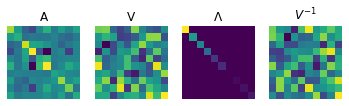

In [10]:
A = np.random.randn(10, 10)
A = A.T @ A

# D: eigenvalue, V: eigenvector
D, V = np.linalg.eig(A)

# Visualize
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()

A
[[ 120.  -68. -186.   66.]
 [ -68.  363.   72.  -19.]
 [-186.   72.  587. -306.]
 [  66.  -19. -306.  270.]]

V
[[ 0.27099937 -0.77804337 -0.55510939  0.11428655]
 [-0.18018525 -0.08023779 -0.17413038 -0.96476618]
 [-0.81779671 -0.47451288  0.29446638  0.13905258]
 [ 0.47465899 -0.40379194  0.75816999 -0.19190931]]

Lambda
[[842.10603029   0.           0.           0.        ]
 [  0.          33.80262392   0.           0.        ]
 [  0.           0.         107.19290412   0.        ]
 [  0.           0.           0.         356.89844167]]

Reconstructed A
[[ 120.  -68. -186.   66.]
 [ -68.  363.   72.  -19.]
 [-186.   72.  587. -306.]
 [  66.  -19. -306.  270.]]



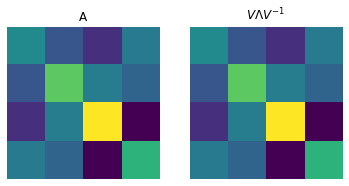

These should be the same


In [11]:
# Make a square matrix for eigendecomposition to be possible
# Round it to make it integers to avoid having complex numbers
A = np.round(10 * np.random.randn(4, 4))
A = A.T @ A

print('A')
print(A)
print()

# Eigendecomposition
evals, evecs = np.linalg.eig(A)

print('V')
print(evecs)
print()

print('Lambda')
print(np.diag(evals))
print()

# Test reconstructing given matrix from eigenvalues eigenvectors
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)

print('Reconstructed A')
print(Ap)
print()

# Visualize
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V \Lambda V^{-1}$')

plt.show()

print('These should be the same')

In [16]:
# From 134 udemy